In [1]:
import re
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import seaborn as sns

In [2]:
known_motifs = glob.glob("*/DMR_bed/*/knownResults.txt")

In [3]:
motif_pvalue = defaultdict(dict)
for motif_result in known_motifs:
    result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
    result_df.index = [x.split("/")[0] for x in result_df.index]
    
    cell_type = motif_result.split("/")[-4]
    hyp, cond = motif_result.split("/")[-2].split("_")[1:]
    for motif, row in result_df.iterrows():
        if row['P-value'] < 0.01:
            motif_pvalue[motif][f'{hyp}_{cell_type}_{cond}'] = row['P-value']

In [4]:
motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')

In [5]:
dense_motif = -np.log10(motif_pvalue_df.sort_index(axis=1).sort_index()).dropna(thresh=10).fillna(0)
sparse_motif = -np.log10(motif_pvalue_df.loc[~motif_pvalue_df.index.isin(dense_motif.index)]).sort_index(axis=1).sort_index().fillna(0)

In [6]:
sparse_motif = sparse_motif.loc[sparse_motif.astype(int).sum(axis=1)>5]

In [7]:
dense_motif['Motif'] = dense_motif.index
dense_motif_melt = dense_motif.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
dense_motif_melt['Cell'] = [x.split("_")[1] for x in dense_motif_melt['Group']]

In [8]:
sparse_motif['Motif'] = sparse_motif.index
sparse_motif_melt = sparse_motif.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
sparse_motif_melt['Cell'] = [x.split("_")[1] for x in sparse_motif_melt['Group']]

In [9]:
color_plate = sns.color_palette("tab10")

cell2color = {'B-Mem': color_plate[0],
             'B-Naive': color_plate[0],
             'Monocyte': color_plate[1],
              'Monocyte1': color_plate[1],
             'NK-cell1': color_plate[2],
             'NK-cell2': color_plate[2],
             'Tc-Mem': color_plate[3],
             'Tc-Naive': color_plate[4],
             'Th-Mem': color_plate[5],
             'Th-Naive': color_plate[6]}

In [10]:
dense_motif_melt.replace(0, np.nan, inplace=True)
sparse_motif_melt.replace(0, np.nan, inplace=True)

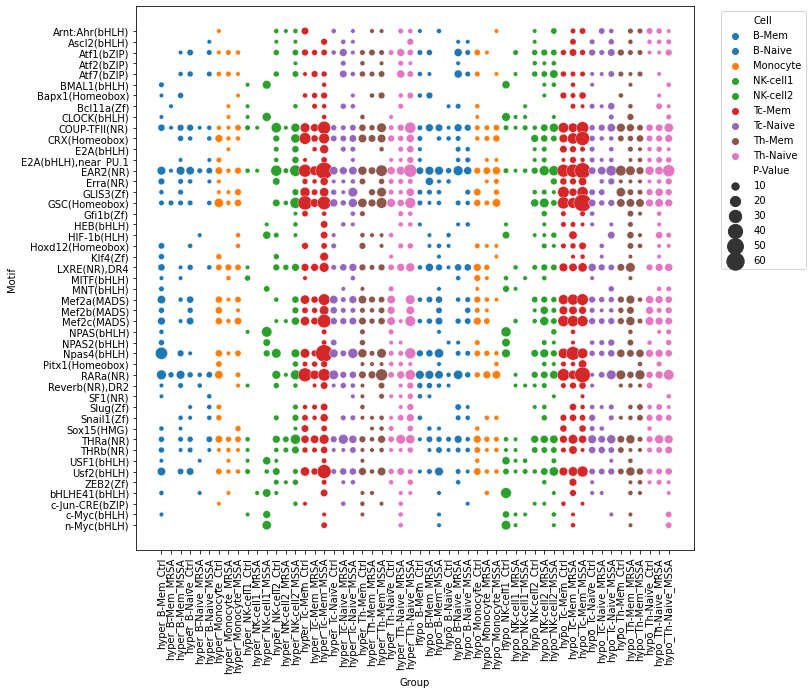

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax = sns.scatterplot(data=dense_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.savefig("dense_Motif_bubblePlot.pdf")

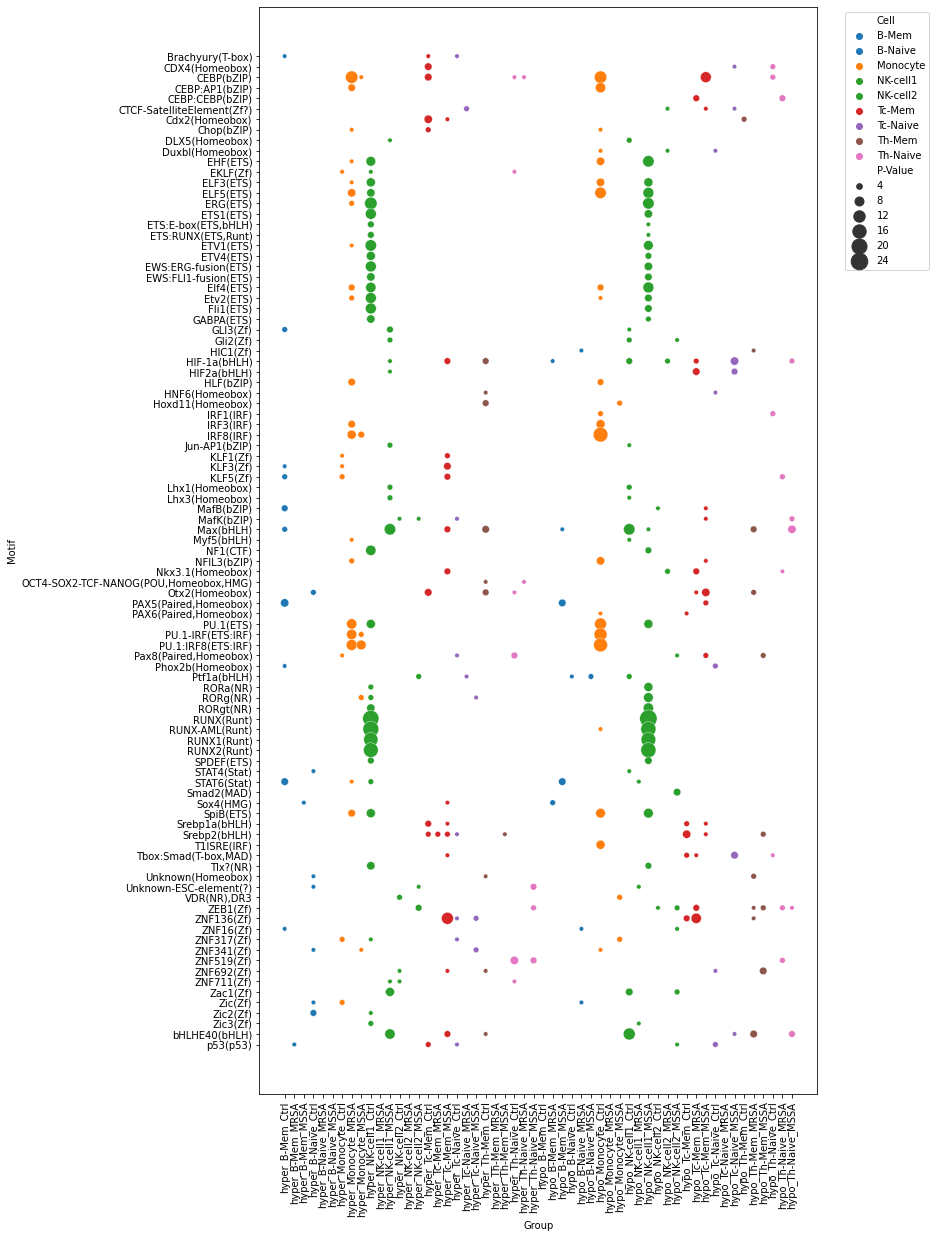

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 20))
ax = sns.scatterplot(data=sparse_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.savefig("sparse_Motif_bubblePlot.pdf")

In [15]:
selected_motifs = [x for x in sparse_motif.index if 'RUNX' in x or 'ETS' in x or 'CEBP' in x]

In [51]:
combined_motifs = pd.concat([sparse_motif.loc[selected_motifs], dense_motif])

In [52]:
combined_motifs

,hyper_B-Mem_Ctrl,hyper_B-Mem_MRSA,hyper_B-Mem_MSSA,hyper_B-Naive_Ctrl,hyper_B-Naive_MRSA,hyper_B-Naive_MSSA,hyper_Monocyte_Ctrl,hyper_Monocyte_MRSA,hyper_Monocyte_MSSA,hyper_NK-cell1_Ctrl,...,hypo_Tc-Naive_Ctrl,hypo_Tc-Naive_MRSA,hypo_Tc-Naive_MSSA,hypo_Th-Mem_Ctrl,hypo_Th-Mem_MRSA,hypo_Th-Mem_MSSA,hypo_Th-Naive_Ctrl,hypo_Th-Naive_MRSA,hypo_Th-Naive_MSSA,Motif
CEBP(bZIP),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,14.0,3.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,4.0,-0.0,-0.0,CEBP(bZIP)
CEBP:AP1(bZIP),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,CEBP:AP1(bZIP)
CEBP:CEBP(bZIP),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,5.0,-0.0,CEBP:CEBP(bZIP)
EHF(ETS),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,9.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,EHF(ETS)
ELF3(ETS),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,8.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,ELF3(ETS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEB2(Zf),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,3.0,-0.0,-0.0,-0.0,3.0,4.0,3.0,5.0,3.0,ZEB2(Zf)
bHLHE41(bHLH),4.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,3.0,-0.0,-0.0,...,3.0,3.0,-0.0,-0.0,4.0,3.0,-0.0,-0.0,3.0,bHLHE41(bHLH)
c-Jun-CRE(bZIP),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,c-Jun-CRE(bZIP)
c-Myc(bHLH),3.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.0,...,-0.0,-0.0,3.0,-0.0,3.0,-0.0,-0.0,-0.0,7.0,c-Myc(bHLH)


In [53]:
new_motif_ids = [f'{x.split("(")[1]}_{x.split("(")[0]}' for x in combined_motifs.index]
new_motif_ids = [re.sub("\)", "", x) for x in new_motif_ids]

In [54]:
combined_motifs = combined_motifs.rename(index=dict(zip(combined_motifs.index, new_motif_ids)))
combined_motifs = combined_motifs.sort_index()

In [55]:
combined_motifs['Motif'] = combined_motifs.index
combine_motif_melt = combined_motifs.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
combine_motif_melt['Cell'] = [x.split("_")[1] for x in combine_motif_melt['Group']]

In [56]:
combine_motif_melt.replace(0, np.nan, inplace=True)

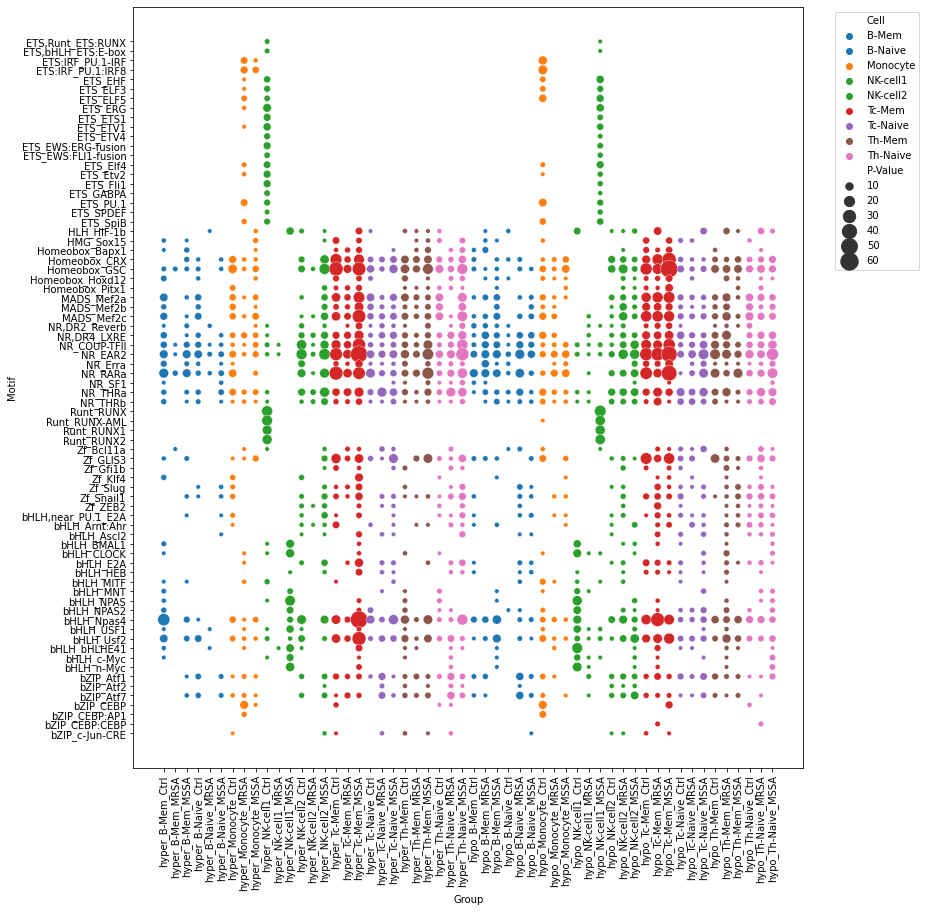

In [60]:
fig, ax = plt.subplots(1,1, figsize=(12, 14))
ax = sns.scatterplot(data=combine_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.savefig("combine_Motif_bubblePlot.pdf")